<a href="https://colab.research.google.com/github/imkvn/public_covid/blob/master/face_recognition_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import face_recognition
!pip install face-recognition
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pandas as pd
import os
import glob
import csv 
import re
import time
import pickle
# Import the required module for text  
# to speech conversion 
!pip install gTTS
from gtts import gTTS  
from gtts import gTTS
from IPython.display import Audio

#create a csv file
header = ['Emp Number', 'Emp Name', 'In Time']
with open('employee_file.csv', mode='a') as employee_file:
    employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    employee_writer.writerow(header)




     |████████████████████████████████| 100.2MB 75kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566172 sha256=53b4ea6a779928a3d949554983c6cc93dffe5479c023893b4d9a37d8cecc0ea4
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models
  Created wheel for gtts-token: filename=gTTS_token-1.1.3-cp36-none-any.whl size=4097 sha256=fcbb742ad052514c815befbf6b479336be8a437299e2f89f7b7e5421de8b6de0
  Stored in directory: /root/.cache/pip/wheels/dd/11/61/33f7e51bf545e910552b2255eead2a7cd8ef54064b46dceb34
Successfully built gtts-token


In [ ]:
#variables
emp_encodings = []
emp_nos = []
emp_names = []
emp_data_file = "emp_data.dat"
emp_dir = 'gdrive/My Drive/employees'

# Load a sample picture and learn how to recognize it.
def read_image(path):
    img = cv2.imread(path)
    (h, w) = img.shape[:2]
    width = 500
    ratio = width / float(w)
    height = int(h * ratio)
    return cv2.resize(img, (width, height))

#save emp encodings and meta data 
def save_file(emp_nos, emp_names, emp_encodings):
  with open(emp_data_file, "wb") as f:
    emp_data = [emp_nos, emp_names, emp_encodings]
    pickle.dump(emp_data, f)


#main program
def initiate_program(file = ''):
  global emp_encodings, emp_nos, emp_names
  if file:
    image_encoding(file)
  else:
    for filename in glob.glob(emp_dir + "**/*.jpg"):
      image_encoding(filename)

# function to encode image
def image_encoding(filename):
  print('file -', filename)
  img = read_image(filename)
  img_enc = face_recognition.face_encodings(img)[0]
  emp_encodings.append(img_enc) 
  filen = re.split('; |/|_',filename)  
  emp_nos.append(filen[3])
  emp_names.append(filen[4].split('.')[0])

# update csv file
def update_csv(empid, empname, intime):
    with open('employee_file.csv', mode='a') as employee_file:
      employee_writer = csv.writer(employee_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)
      employee_writer.writerow([empid, empname, intime])
    
    return

#fucntion to greet employee
def wish_gm(empname):
    #audio message greating the employee
    message = 'Good Morning! ' + empname + '. Have a nice day.'
    audio_gm = gTTS(message)
    audio_gm.save('gm.wav')
    sound_file = 'gm.wav'
    return Audio(sound_file, autoplay=True)

#initiate program
if os.path.isfile(emp_data_file):
  print("file exists")
  with open(emp_data_file, "rb") as f:
    emp_nos, emp_names, emp_encodings = pickle.load(f)
    print( emp_nos, emp_names, emp_encodings)
else:
  print("file doesn't exist")
  initiate_program()
  save_file(emp_nos, emp_names, emp_encodings)

print(emp_nos)
print(emp_names)
print(emp_encodings)


file doesn't exist
file - gdrive/My Drive/employees/03_kartik.jpg
file - gdrive/My Drive/employees/01_sachin.jpg
file - gdrive/My Drive/employees/02_virat.jpg
['03', '01', '02']
['kartik', 'sachin', 'virat']
[array([-0.15384938,  0.13332589,  0.0313804 , -0.07003583, -0.03593961,
       -0.06117424,  0.03779652,  0.01445149,  0.25206783, -0.01258201,
        0.12648894,  0.01967439, -0.16549051, -0.11007501,  0.03298035,
        0.07186861, -0.15569131, -0.07679731, -0.07776338, -0.07034241,
        0.05616153,  0.02161117,  0.0094903 ,  0.08884263, -0.1801033 ,
       -0.32760131, -0.01959825, -0.11243074,  0.03312821, -0.08036157,
        0.0111776 ,  0.0576187 , -0.19741233, -0.09913991, -0.0405071 ,
        0.13035013, -0.02674859, -0.00436923,  0.16761835,  0.03989655,
       -0.1166481 ,  0.00362329, -0.0158805 ,  0.30535522,  0.15276927,
        0.0440594 ,  0.01930762,  0.003323  ,  0.12636001, -0.24748591,
       -0.00924389,  0.11843086,  0.04428089,  0.04989748,  0.08624385,

In [ ]:
update_csv("02", "virat", "1505")

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


<IPython.core.display.Javascript object>

Saved to photo.jpg


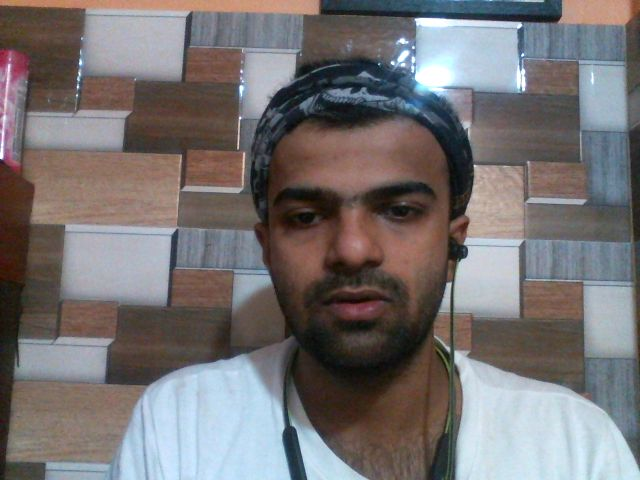

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(newemp = ''):
  if newemp:
    filename = emp_dir + "/" + newemp + ".jpg"
  else: 
    filename='photo.jpg'
  
  quality=0.8
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


In [ ]:

new_image = read_image('photo.jpg')
new_image_enc = face_recognition.face_encodings(new_image)[0]
results = face_recognition.compare_faces(emp_encodings, new_image_enc)
#results = face_recognition.face_distance(emp_encodings, new_image_enc)
print("results ", results)

match = np.where(results)[0]
#print("match ", match)
data = pd.read_csv("employee_file.csv") 
#print("data -", data)

#print('match -',match[0])
#print('match size-',match.size)
#print("data emp no", data['Emp Number'])
#print("emp nos-", emp_nos[match[0]])
if match.size and not (data[data['Emp Number'] == int(emp_nos[match[0]])].index.tolist()):

  #update CSV file
  update_csv(emp_nos[match[0]], emp_names[match[0]], time.time())

  #Wish gm
  wish_gm(emp_names[match[0]]) 




results  [True, False, False]


Use file format (EMPID_EMPNAME) 100_Kalai


<IPython.core.display.Javascript object>

Saved to gdrive/My Drive/employees/100_Kalai.jpg


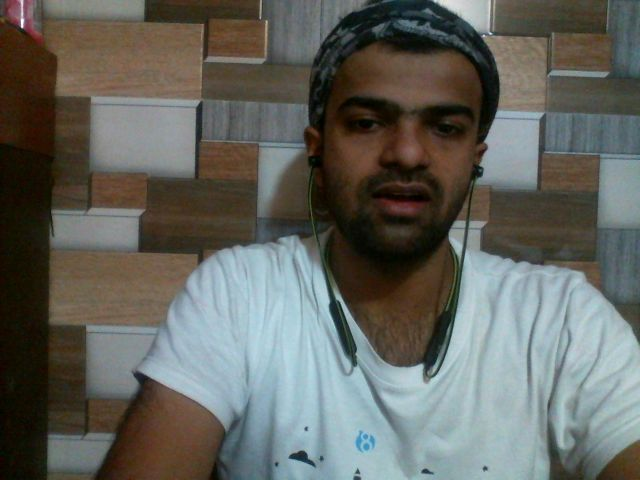

file - gdrive/My Drive/employees/100_Kalai.jpg
Check emp nos ['03', '01', '02', '100']
Check emp names ['kartik', 'sachin', 'virat', 'Kalai']


In [ ]:
#Entry of new employee in the database 

newemp = input('Use file format (EMPID_EMPNAME) ')

try:
  filename = take_photo(newemp)
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))


initiate_program(filename)
save_file(emp_nos, emp_names, emp_encodings)
file_split = re.split('; |/|_',newemp)
update_csv(file_split[0], file_split[1], time.time())

print("Check emp nos",emp_nos)
print("Check emp names", emp_names)
